In [1]:
import tests.utils as utils
from spectral_connectivity import Multitaper, Connectivity

traces = utils.load_large_test_traces()

multi_t = Multitaper(
    time_series=traces,
)

connectivity = Connectivity.from_multitaper(multi_t)

/Users/abrahamq/work/lab/diff_fam_social_memory_ephys/lfp/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Text(0, 0.5, 'Power')

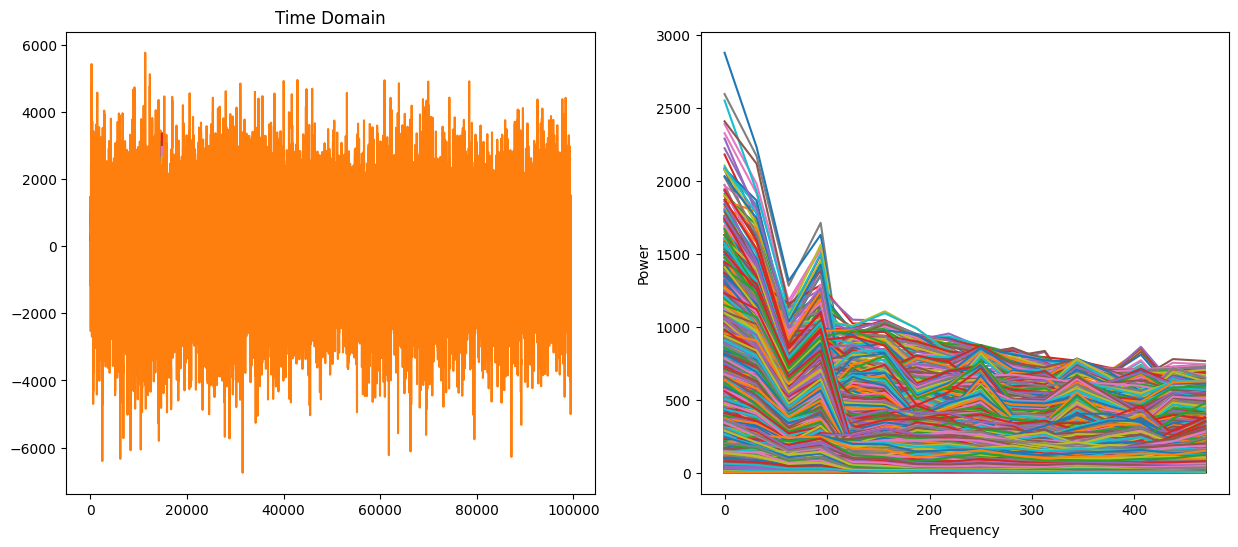

In [4]:
import matplotlib.pyplot as plt
connectivity

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(traces.squeeze().T)
axes[0].set_title("Time Domain")


axes[1].plot(connectivity.frequencies[0:100], connectivity.power().squeeze())
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Power")

In [3]:

# Plot connectivity matrix using matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Get coherence values
coherence = connectivity.coherence()

# Create a heatmap
plt.figure(figsize=(10, 8))
im = plt.imshow(coherence, cmap='viridis', aspect='equal')

# Add colorbar
plt.colorbar(im)

# Add labels and title
plt.title('Coherence Between Channels')
plt.xlabel('Channel')
plt.ylabel('Channel')

# Optional: Add tick labels if needed
# plt.xticks(np.arange(coherence.shape[1]))
# plt.yticks(np.arange(coherence.shape[0]))

plt.show()

AttributeError: 'Connectivity' object has no attribute 'coherence'

Text(0, 0.5, 'Power')

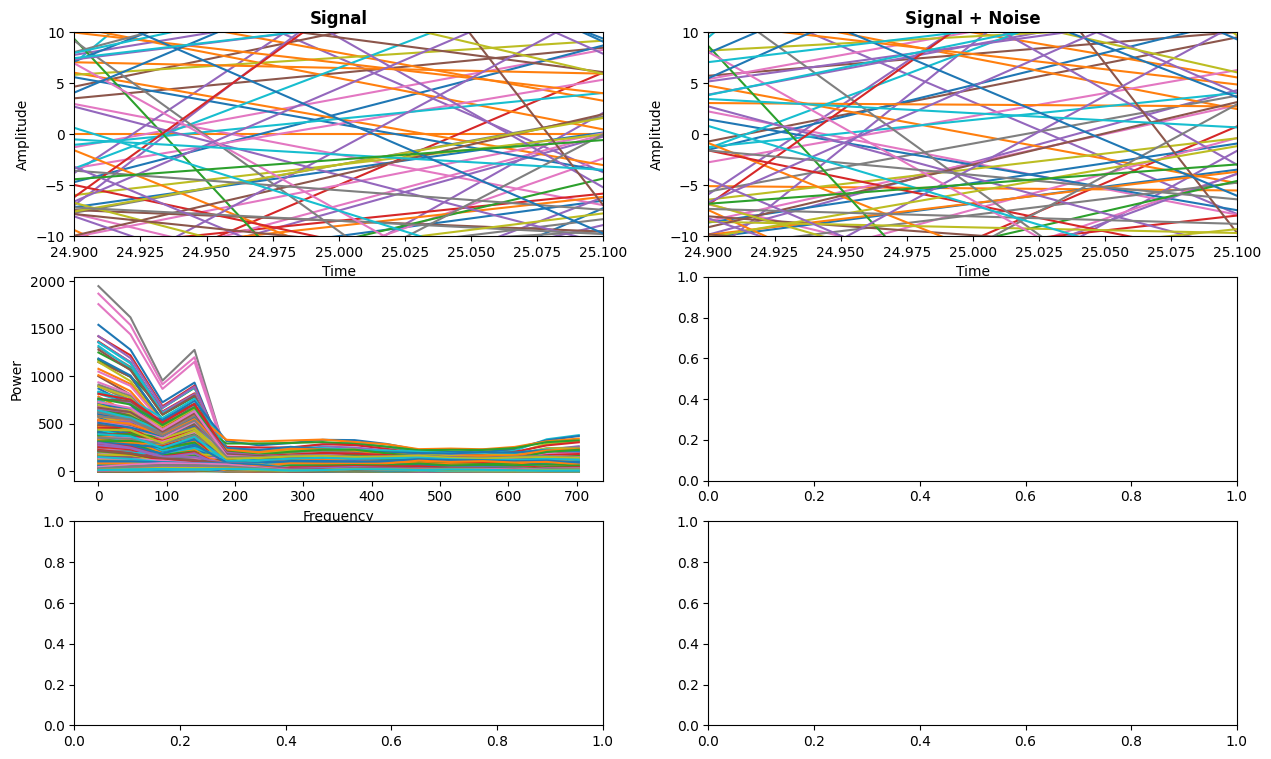

In [24]:

# Simulate signal
frequency_of_interest = [200, 50]
sampling_frequency = 1500
time_extent = (0, 50)
n_time_samples = traces.shape[0]
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)
signal = traces
noise = np.random.normal(0, 4, signal.shape)

# Plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes[0, 0].plot(time, signal)
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].set_xlim((24.90, 25.10))
axes[0, 0].set_ylim((-10, 10))

axes[0, 1].plot(time, signal + noise)
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].set_xlim((24.90, 25.10))
axes[0, 1].set_ylim((-10, 10))

multitaper = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=3,
    start_time=time[0],
)
connectivity = Connectivity.from_multitaper(multitaper)
axes[1, 0].plot(connectivity.frequencies, connectivity.power().squeeze())
axes[1, 0].set_xlabel("Frequency")
axes[1, 0].set_ylabel("Power")


In [2]:
from tests.test_LFP_recording import helper


lfp_rec = helper()


/Users/abrahamq/work/lab/diff_fam_social_memory_ephys/lfp/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
lfp_rec.recording.get_channel_ids()

array(['1', '3', '5', '7', '9', '11', '13', '15', '17', '19', '21', '23',
       '25', '27', '29', '31'], dtype='<U64')

In [ ]:
from tests.test_LFP_recording import helper_cups
lfp_cups = helper_cups()